## [詳解ディープラーニング　TensorFlow・Kerasによる時系列データ処理](https://book.mynavi.jp/ec/products/detail/id=72995)
　巣籠悠輔 著  
　マイナビ出版  
　ISBN : 978-4-8399-6251-7  
　発売 : 2017/05/30  
  
support site : [https://book.mynavi.jp/supportsite/detail/9784839962517.html](https://book.mynavi.jp/supportsite/detail/9784839962517.html)  
github : [yusugomori/deeplearning-tensorflow-keras](https://github.com/yusugomori/deeplearning-tensorflow-keras) 

Most of codes and explanations in this notebook are based on the textbook.  
If you want to use codes in this notebook, please check the book and original codes from the above.  

---
## ３章　単純パーセプトロン

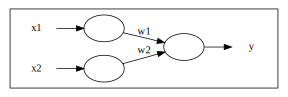

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="4,4"

with dot.subgraph(name='cluster_0') as c:
    c.node('x1', 'x1', shape='plaintext')
    c.node('x2', 'x2', shape='plaintext')
    c.node('l1a', '')
    c.node('l1b', '')
    c.edge('x1', 'l1a')
    c.edge('x2', 'l1b')
    c.node('l2', '')
    c.edge('l1a','l2', label='w1')
    c.edge('l1b', 'l2', label='w2')
    c.node('y', 'y',shape='plaintext')
    c.edge('l2','y')
    c.body.append('{rank=min; x1; x2;}')
    c.body.append('{rank=max; y;}')

dot

ニューロンのモデルとして、上の図のような１層パーセプトロンを考える。  
　（ただし、確率的な挙動は一切示さないものとする）  
入力 $x_{1}$、$x_{2}$ を受けた時に、重み付き和が閾値 $\theta$を超えた時に発火する、すなわち  
  
\begin{align*}
y=\begin{cases}
1 & (w_{1}x_{1} + w_{2}x_{2} \geq \theta) \\\
0 & (w_{1}x_{1} + w_{2}x_{2} < \theta) 
\end{cases}\end{align*}
に従って出力 $y$ が決定するものとする。  

上記モデルのパラメータ $(w_{1}, w_{2}, \theta)$ の値を誤り訂正学習法によって得ることを考える。  
  
正しい出力 $t$ が既知であるとき  
　$ y > t $ なら $y$ が小さくなるように修正する    
　$ y < t $ なら $y$ が大きくなるように修正する  
ことによって正しいパラメータを目指す。  
  
この修正分を $\Delta w_{1}$ 、 $\Delta w_{2}$ 、 $\Delta \theta$ と表し、k回目の学習によるパラメータを $(w_{1}^{k}, w_{2}^{k}, \theta^{k})$ とすると、この方法は  

\begin{align*}
\Delta w_{1} &= (t-y)x_{1} & w_{1}^{k+1} &= w_{1}^{k} + \Delta w_{1} \\
\Delta w_{2} &= (t-y)x_{2} & w_{2}^{k+1} &= w_{2}^{k} + \Delta w_{2} \\
\Delta \theta &= -(t-y) & \theta^{k+1} &= \theta^{k} + \Delta \theta
\end{align*}

のようにまとめることができる。  
この更新式を、$y-t=0$ となるまで行うことを試みる。  
  
パラメータの初期値を $(w_{1}, w_{2}, \theta) = (0, 0, 0)$ 、  
入力 $x_{1}, x_{2}$ は0または1の値をとり、正しい出力をANDゲートとするとき、   

In [2]:
import numpy as np
import pandas as pd

# 正解となる出力データ
def tercher_AND_gate(x1,x2):
    output = {(0,0):0, (0,1):0, (1,0):0, (1,1):1}
    return output[(x1, x2)]

# 使用するモデル
def y(x1, x2, w1, w2, theta):
    input_sum = w1*x1 + w2*x2 
    if input_sum >= theta:
        return 1
    else:
        return 0
    
def update(dataset, max_iter=100, w1=0, w2=0, theta=0, y=y, t=tercher_AND_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x1, x2 = data[0], data[1]
            t_val = t(x1, x2)
            y_val = y(x1, x2, w1, w2, theta)
            dw1 = (t_val - y_val) * x1
            dw2 = (t_val - y_val) * x2
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x1, x2, t_val, w1, w2, theta, y_val, t_val-y_val, dw1, dw2, dtheta])
            
            w1 += dw1
            w2 += dw2
            theta += dtheta
            
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w1, w2, theta = {}, {}, {}".format(w1, w2, theta))
    return record
            
    
w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_AND_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=24
w1, w2, theta = 2, 1, 3


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0
3,4,1,1,1,0,0,1,0,1,1,1,-1
4,5,0,0,0,1,1,0,1,-1,0,0,1
5,6,0,1,0,1,1,1,1,-1,0,-1,1
6,7,1,0,0,1,0,2,0,0,0,0,0
7,8,1,1,1,1,0,2,0,1,1,1,-1
8,9,0,0,0,2,1,1,0,0,0,0,0
9,10,0,1,0,2,1,1,1,-1,0,-1,1


In [3]:
# ORゲートの場合
import numpy as np
import pandas as pd

def tercher_OR_gate(x1,x2):
    output = {(0,0):0, (0,1):1, (1,0):1, (1,1):1}
    return output[(x1, x2)]

w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_OR_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=16
w1, w2, theta = 1, 1, 1


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,1,0,0,1,0,1,0,1,-1
2,3,1,0,1,0,1,0,1,0,0,0,0
3,4,1,1,1,0,1,0,1,0,0,0,0
4,5,0,0,0,0,1,0,1,-1,0,0,1
5,6,0,1,1,0,1,1,1,0,0,0,0
6,7,1,0,1,0,1,1,0,1,1,0,-1
7,8,1,1,1,1,1,0,1,0,0,0,0
8,9,0,0,0,1,1,0,1,-1,0,0,1
9,10,0,1,1,1,1,1,1,0,0,0,0


In [4]:
# NOTゲートの場合

# 書籍と結果が違うが、書籍のほうでは
# y=1 if w*x >= theta　の不等号が　>　に置き換わっている？

import numpy as np
import pandas as pd

def tercher_NOT_gate(x):
    output = {0:1, 1:0}
    return output[x]

def y_single(x, w, theta):
    return 1 if w*x >= theta else 0

    # 書籍と同じ結果を出すなら
    #return 1 if w*x > theta else 0

def update_NOT_gate(dataset, max_iter=100, w=0, theta=0, y=y_single, t=tercher_NOT_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x = data[0]
            t_val, y_val = t(x), y(x, w, theta)
            dw, dtheta = (t_val - y_val) * x, -1*(t_val-y_val)
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w += dw
            theta += dtheta  
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record
    
w, theta, dataset = 0, 0, [[0,1],[1,0]]
record = update_NOT_gate(dataset, max_iter=100, w=w, theta=theta, y=y_single, t=tercher_NOT_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=6
w, theta = -1, 0


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,0,1,0,0,1,0,0,0
1,2,1,0,0,0,1,-1,-1,1
2,3,0,1,-1,1,0,1,0,-1
3,4,1,0,-1,0,0,0,0,0
4,5,0,1,-1,0,1,0,0,0
5,6,1,0,-1,0,0,0,0,0


In [1]:
# 一括対応ver

import numpy as np
import pandas as pd

# 正解となる出力データ
def teacher_gate(x, teacher_data):
    return teacher_data[tuple(x)]

# 使用するモデル
def gate_model(x,w,theta):
    return 1 if np.sum(np.multiply(x,w)) >= theta else 0
    
def update(dataset, w, theta, teacher_data, max_iter=100, y=gate_model, t=teacher_gate):
    record = []
    iter_count, val_dif = 0, 1
    while (iter_count < max_iter) and (val_dif != 0):
        val_dif = 0
        
        for x in dataset:
            x = np.array(x)
            t_val, y_val = t(x, teacher_data), y(x, w, theta)
            dw = (t_val - y_val) * x
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w = np.add(w,dw)
            theta += dtheta
 
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record

dataset = {"two_input" : [[0,0],[0,1],[1,0],[1,1]],
           "one_input" : [[0],[1]]
          }
teacher_data = {"AND_gate" : {(0,0):0, (0,1):0, (1,0):0, (1,1):1},
                "OR_gate" : {(0,0):0, (0,1):1, (1,0):1, (1,1):1},
                "NOT_gate" : {(0,):1, (1,):0}
               }

# 初期値
w, theta = np.array([0,0]), np.array(0)

record = update(dataset["two_input"], w=w, theta=theta, 
                teacher_data = teacher_data["OR_gate"],
                max_iter=100)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=16
w, theta = [1 1], 1


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,"[0, 0]",0,"[0, 0]",1,1,-1,"[0, 0]",1
1,2,"[0, 1]",1,"[0, 0]",1,0,1,"[0, 1]",-1
2,3,"[1, 0]",1,"[0, 1]",1,1,0,"[0, 0]",0
3,4,"[1, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
4,5,"[0, 0]",0,"[0, 1]",1,1,-1,"[0, 0]",1
5,6,"[0, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
6,7,"[1, 0]",1,"[0, 1]",1,0,1,"[1, 0]",-1
7,8,"[1, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0
8,9,"[0, 0]",0,"[1, 1]",1,1,-1,"[0, 0]",1
9,10,"[0, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0


---

１層パーセプトロンをn個の入力に対応させる。すなわち

\begin{align*}
y=\begin{cases}
1 & (w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} \geq \theta) \\\
0 & (w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} < \theta) 
\end{cases}\end{align*}

とする。ここで、次の関数 $f(x)$ を考えると、

\begin{align*}
f(x)=\begin{cases}
1 & (x \geq 0) \\\
0 & (x < 0) 
\end{cases}\end{align*}

ネットワークの出力 $y$ は、次のように書き直すことができる。

\begin{align*}
y = f(w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} - \theta)
\end{align*}

この $f(x)$ をステップ関数という。

入力 $x$ と重み $w$ を列ベクトルとして


\begin{align*}
X=\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{pmatrix}
, \, W=\begin{pmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{n}
\end{pmatrix}
\end{align*}

と表記し、 $-\theta = b$ とおけば、出力は次のように表すことができる。

\begin{align*}
y = f(W^{\mathrm{T}}X + b)
\end{align*}

この表記の元で、更新式は次のようになる。

\begin{align*}
\Delta W &= (t-y)X & W^{k+1} &= W^{k} + \Delta W \\
\Delta b &= t-y & b^{k+1} &= b^{k} + \Delta b
\end{align*}

#### 実装
２種類の正規分布に従うデータの分類を考える。  
入力数は２、データ数はそれぞれ１０、  
一方のデータは平均値が０，他方のデータは平均値が５で、  
前者に０，後者に１を出力すべきものとする。  

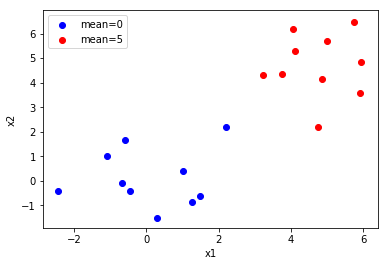

In [50]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(123)

d, N, mean = 2, 10, 5
x1 = rng.randn(N,d) + np.array([0,0])
x2 = rng.randn(N,d) + np.array([mean, mean])
x = np.concatenate((x1,x2), axis=0)

plt.scatter(x1[:,0], x1[:,1], c='b', label="mean=0")
plt.scatter(x2[:,0], x2[:,1], c='r', label="mean=5")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

W = [ 2.14037745  1.2763927 ], b = -9


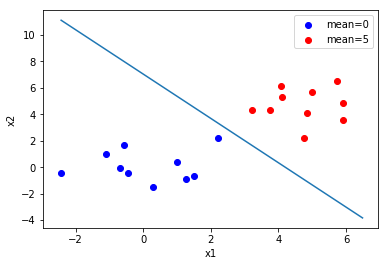

In [51]:
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w,x)+b)

def step(x):
    return 1*(x>0)

def t(i):
    return 0 if i<N else 1
    
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w==0)*(delta_b==0)
    if classified:
        break
        
print("W = {}, b = {}".format(w, b))
line_x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(line_x, (w[0]*line_x+b) * (-1/w[1]))
plt.scatter(x1[:,0], x1[:,1], c='b', label="mean=0")
plt.scatter(x2[:,0], x2[:,1], c='r', label="mean=5")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

---
### ロジスティック回帰

単純パーセプトロンに確率的な出力を導入し、出力が行われることを「発火」と表現する  
　（注：表記は文献に従っている。生物のニューロンの発火とは無関係である）  
  
ある入力 $X$ に対して発火するとき１を、しないとき０をとる確率変数 $C$ を考える。  
このとき  
  
\begin{align*}
p(C=1|X) & = \sigma (W^{\mathrm{T}}X + b) \\
p(C=0|X) & = 1 - p(C=1|X)
\end{align*}
  
となるので、 $y := \sigma (W^{\mathrm{T}}X + b)$ とすると、上の２式は  
  
\begin{align*}
p(C=t|X) &= y^{t}(1-y)^{1-t} \\ 
&\text{where} \, t \in \{0,1\}
\end{align*}
  
と表すことができる。  

さて、N個の入力データ $X_{n} \, (n=1,2,\dots,N)$ とそれぞれ対応する正解出力 $t_{n}$ が与えられたとき、  
重み $W$ およびバイアス $b$ を最尤推定するための尤度関数は次のように表すことができる。  

\begin{align*}
L(W,b) &= \prod^{N}_{n=1}p(C=t_{n}|X_{n}) \\
&= \prod^{N}_{n=1}y^{t_{n}}_{n}(1-y_{n})^{1-t_{n}}
\end{align*}

学習を最適化問題として捉え、最尤推定（ $L(W,b)$ の最大化）によってパラメータ $W,b$ を調整することを考える。

上の式の対数をとり、一般的な表記に合わせるため符号を入れ替えて、
交差エントロピー誤差関数
 
 \begin{align*}
 E(W,b) :=& -\log L(W,b) \\
 =& -\sum^{N}_{n=1} \{ t_{n}\log y_{n} + (1-t_{n}) \log (1-y_{n}) \}
 \end{align*}
 
を与える。

---
#### 勾配降下法 (gradient descent)

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \frac{\partial E(W,b)}{\partial W} \\
b^{(k+1)} &= b^{(k)} - \eta \frac{\partial E(W,b)}{\partial b}
\end{align*}
ここで $\eta$ は学習率である。

交差エントロピー誤差関数を  
  
\begin{align*} E(W,b) := -\sum^{N}_{n=1}E_{n} \end{align*}  
すなわち  
\begin{align*} E_{n} := -\{ t_{n}\log y_{n} + (1-t_{n} \log (1-y_{n}) \} \end{align*}  
と表すと、重み $W$ の勾配は

\begin{align*}
\frac{\partial E(W,b)}{\partial W} &= \sum^{N}_{n=1} \frac{\partial E_{n}}{\partial y_{n}} \frac{\partial y_{n}}{\partial W} \\
&= -\sum^{N}_{n=1} \left( \frac{t_{n}}{y_{n}} - \frac{1-t_{n}}{1-y_{n}} \right) \frac{\partial y_{n}}{\partial W} \\
&= -\sum^{N}_{n=1} \left( \frac{t_{n}}{y_{n}} - \frac{1-t_{n}}{1-y_{n}} \right) y_{n}(1-y_{n})X_{n} \\
&= -\sum^{N}_{n=1} \left( t_{n}(1-y_{n}) - y_{n}(1-t_{n}) \right) X_{n} \\
&= -\sum^{N}_{n=1} \left( t_{n} - y_{n} \right) X_{n}
\end{align*}

となる。バイアス $b$ についても同様に計算して

\begin{align*}
\frac{\partial E(W,b)}{\partial b} =　-\sum^{N}_{n=1} \left( t_{n} - y_{n} \right)
\end{align*}

となるから、パラメータの更新式は

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \sum^{N}_{n=1} \left( t_{n} - y_{n} \right) X_{n} \\
b^{(k+1)} &= b^{(k)} - \eta \sum^{N}_{n=1} \left( t_{n} - y_{n} \right)
\end{align*}

と書くことができる。

上記の更新式はN個のデータについて総和をとる必要があり、巨大なデータセットに対しては現実的でない。  
そこで勾配降下法のオンライン版である確率的勾配降下法 (Stochastic gradient descent) を用いる。  
これはパラメータの更新に際しランダムにデータを選択して更新式を適用するもので、  

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \left( t_{n} - y_{n} \right) X_{n} \\
b^{(k+1)} &= b^{(k)} - \eta \left( t_{n} - y_{n} \right)
\end{align*}

と表される。

データ全体を用いるバッチ学習とランダムに１つを選んでの更新を繰り返すオンライン学習との中間として  
ミニバッチ学習があり、よく用いられる。  

----
#### TensorFlowによる実装
（tensorflowのバージョンアップに伴い、githubに掲載されているコードを参照した。  
　参照：[deeplearning-tensorflow-keras/3/tensorflow/01_logistic_regression_or_tensorflow.py](https://github.com/yusugomori/deeplearning-tensorflow-keras/blob/master/3/tensorflow/01_logistic_regression_or_tensorflow.py)）

memo:  
　TensorFlowをpip installするとpython3.5用のものが入るので、エラーが生じる場合は  
　[公式の手順](https://www.tensorflow.org/install/install_linux#InstallingNativePip)から[バイナリのURL](https://www.tensorflow.org/install/install_linux#the_url_of_the_tensorflow_python_package)を指定して導入またはUpgradeしておく
  
参考：  
　[TensorFlow 1.4 (gpu Linux) Py36 not built with Py36 #14218](https://github.com/tensorflow/tensorflow/issues/14218)  
　[Creating a specific 3.6 binary for Linux #14182](https://github.com/tensorflow/tensorflow/issues/14182)  

In [2]:
import numpy as np
import tensorflow as tf

# 変数、パラメータ、誤差関数の定義
w = tf.Variable(tf.zeros([2,1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x,w)+b)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))

# 学習と結果確認方法の定義
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

# データの準備
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

# セッションの作成と初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 学習の実行
for epoch in range(200):
    sess.run(train_step, feed_dict = {
        x: X,
        t: Y
    })

In [3]:
# 学習結果の確認
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
print("classified:\n", classified)

prob = y.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
print("output probability:\n", prob)

print("parameter:\n W={}, \n b={}".format(sess.run(w), sess.run(b)))

classified:
 [[ True]
 [ True]
 [ True]
 [ True]]
output probability:
 [[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
parameter:
 W=[[ 3.61188436]
 [ 3.61188436]], 
 b=[-1.24509501]


#### Kerasによる実装

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

model.fit(X, Y, epochs=200, batch_size=1)

classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print("\n\nclassified:\n", Y==classes)
print("\noutput probability:\n", prob)

Using TensorFlow backend.


Epoch 1/200
4/4 [==============================] - 0s - loss: 1.1153     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.9699     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8575     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7739     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7087     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.6595     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.6215     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.5914     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.5676     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.5477     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.5312     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.5172     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.5045     
Epoch 14/200
4/4 [================

4/4 [==============================] - 0s - loss: 0.1897     
Epoch 110/200
4/4 [==============================] - 0s - loss: 0.1884     
Epoch 111/200
4/4 [==============================] - 0s - loss: 0.1872     
Epoch 112/200
4/4 [==============================] - 0s - loss: 0.1859     
Epoch 113/200
4/4 [==============================] - 0s - loss: 0.1847     
Epoch 114/200
4/4 [==============================] - 0s - loss: 0.1835     
Epoch 115/200
4/4 [==============================] - 0s - loss: 0.1823     
Epoch 116/200
4/4 [==============================] - 0s - loss: 0.1811     
Epoch 117/200
4/4 [==============================] - 0s - loss: 0.1799     
Epoch 118/200
4/4 [==============================] - 0s - loss: 0.1787     
Epoch 119/200
4/4 [==============================] - 0s - loss: 0.1776     
Epoch 120/200
4/4 [==============================] - 0s - loss: 0.1764     
Epoch 121/200
4/4 [==============================] - 0s - loss: 0.1753     
Epoch 122/200
4/4 [=======